# Initial Simulation Test

In [1]:
from utils import create_polynomial, compute_borda, full_rank_aggregation
from classes import Voter
from visualize import ranking_text, plot_ranking
import random

In [2]:
NUM_VOTERS = 50
CANDIDATES = [1, 2, 3, 4, 5]

In [3]:
def simulate_election():

    voters = []
    for _ in range(NUM_VOTERS):
        voter = Voter()
        # Create a random polynomial utility function for each voter
        coefficients = [random.uniform(-100, 100) for _ in range(4)]  # Quadratic polynomial
        ut_func = create_polynomial(coefficients)
        voter.set_utility_function(ut_func)
        voters.append(voter)

    comparisons = []
    full_ranks = []
    for i in range(len(CANDIDATES)):
        for j in range(i + 1, len(CANDIDATES)):
            candidate_1 = CANDIDATES[i]
            candidate_2 = CANDIDATES[j]
            for voter in voters:
                preference = voter.get_preference(candidate_1, candidate_2)
                if preference is not None:
                    comparisons.append(preference)
                
                full_rank = voter.get_rank(CANDIDATES)
                full_ranks.append(full_rank)

    borda_scores = compute_borda(comparisons)
    full_rank_aggregated = full_rank_aggregation(full_ranks)
    return borda_scores, full_rank_aggregated

In [4]:
outputs = simulate_election()

In [5]:
outputs[0], outputs[1]

({1: 40, 2: 20, 3: 0, 4: -20, 5: -40},
 {5: 920, 4: 960, 3: 1000, 2: 1040, 1: 1080})

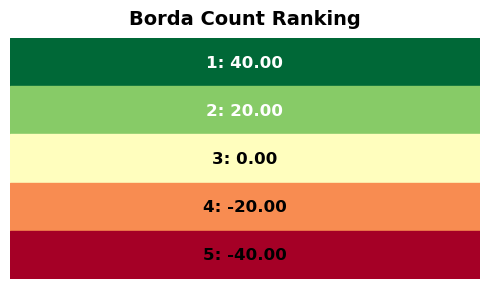

In [6]:
ranking_text(outputs[0])
plot_ranking(outputs[0], title="Borda Count Ranking")

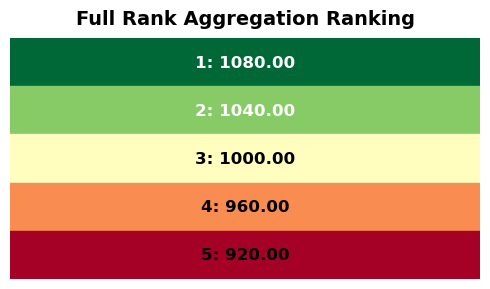

In [7]:
ranking_text(outputs[1])
plot_ranking(outputs[1], title="Full Rank Aggregation Ranking")

In [8]:
def simulate_limited_election(num_comparisons=0):

    voters = []
    for _ in range(NUM_VOTERS):
        voter = Voter()
        # Create a random polynomial utility function for each voter
        coefficients = [random.uniform(-100, 100) for _ in range(4)]  # Quadratic polynomial
        ut_func = create_polynomial(coefficients)
        voter.set_utility_function(ut_func)
        voters.append(voter)

    comparisons = []
    C = len(CANDIDATES)
    for i in range(num_comparisons):
        # for j in range(i + 1, len(CANDIDATES)):
        #     candidate_1 = CANDIDATES[i]
        #     candidate_2 = CANDIDATES[j]
        candidate_1 = random.choice(CANDIDATES)
        candidate_2 = random.choice(CANDIDATES)
        for voter in voters:
            preference = voter.get_preference(candidate_1, candidate_2)
            if preference is not None:
                comparisons.append(preference)

    full_ranks = []   
    for i in range(NUM_VOTERS):
        voter = voters[i]
        full_rank = voter.get_rank(CANDIDATES)
        full_ranks.append(full_rank)

    borda_scores = compute_borda(comparisons)
    full_rank_aggregated = full_rank_aggregation(full_ranks)
    return borda_scores, full_rank_aggregated

In [9]:
C = len(CANDIDATES)
outputs = simulate_limited_election(num_comparisons=int(0.5 * C * (C - 1)))

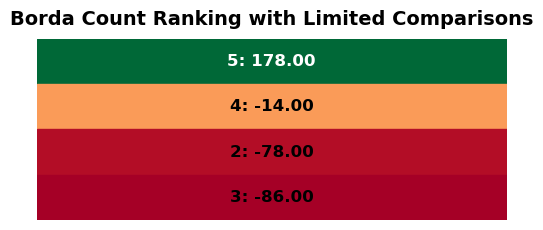

In [10]:
plot_ranking(outputs[0], title="Borda Count Ranking with Limited Comparisons")

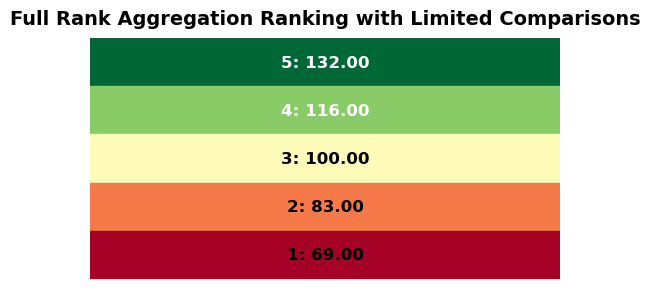

In [11]:
plot_ranking(outputs[1], title="Full Rank Aggregation Ranking with Limited Comparisons")

## Stress Test

In [27]:
import numpy as np

NUM_VOTERS = 500
CANDIDATES = np.arange(0, 100)

C = len(CANDIDATES)

In [28]:
outputs = simulate_limited_election(num_comparisons=int(0.5 * C * (C - 1)))

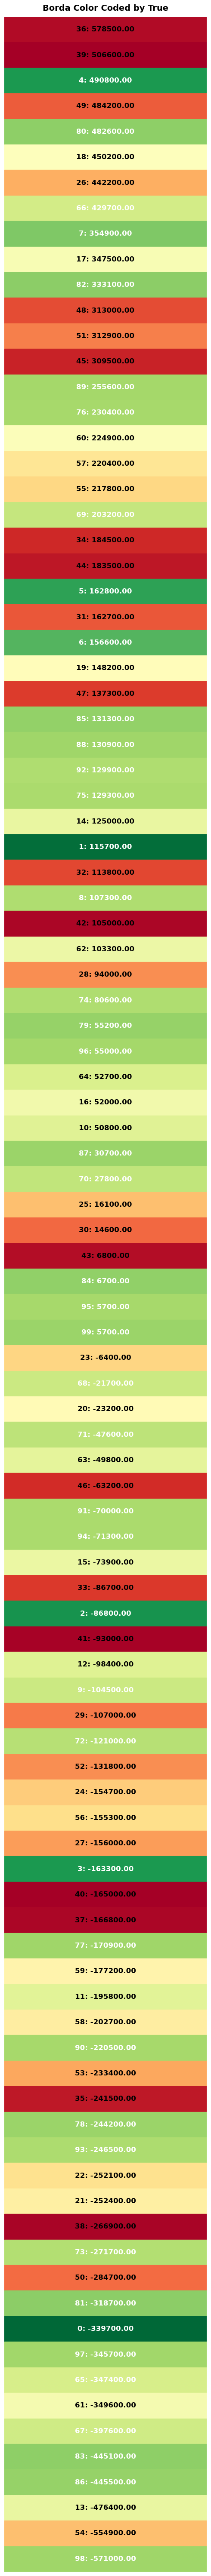

In [31]:
from visualize import plot_borda_ranking
plot_borda_ranking(outputs[0], outputs[1])

In [15]:
# plot_ranking(outputs[1], title="Full Rank Aggregation Ranking with Limited Comparisons - Stress Test")

## Computing Average Utility

In [16]:
NUM_VOTERS = 50

In [17]:
CANDIDATES = [1, 2, 3, 4, 5]

In [18]:
voters = []
for _ in range(NUM_VOTERS):
    voter = Voter()
    # Create a random polynomial utility function for each voter
    coefficients = [random.uniform(-100, 100) for _ in range(4)]  # Quadratic polynomial
    ut_func = create_polynomial(coefficients)
    voter.set_utility_function(ut_func)
    voters.append(voter)

In [19]:
for c in CANDIDATES:
    avg_utility = sum(voter.ut_func(c) for voter in voters) / NUM_VOTERS
    print(f"Average utility for candidate {c}: {avg_utility}")

Average utility for candidate 1: -9.368216432222983
Average utility for candidate 2: -50.2657164338548
Average utility for candidate 3: -153.07001795796523
Average utility for candidate 4: -343.19129296768244
Average utility for candidate 5: -646.0397134261348


In [20]:
import numpy as np

In [21]:
CANDIDATES = np.array(CANDIDATES)

In [22]:
ranking_0 = CANDIDATES
ranking_1 = np.random.permutation(CANDIDATES)
ranking_2 = np.random.permutation(CANDIDATES)

print("Ranking 0:", ranking_0)
print("Ranking 1:", ranking_1)
print("Ranking 2:", ranking_2)

Ranking 0: [1 2 3 4 5]
Ranking 1: [3 5 4 2 1]
Ranking 2: [4 1 5 3 2]


In [23]:
def avg_candidate_utility(candidate):
    return sum(voter.ut_func(candidate) for voter in voters) / NUM_VOTERS

In [24]:
C = len(CANDIDATES)
w = np.arange(C, 0, -1)

def avg_society_utility(ranking, weights):
    return np.sum(avg_candidate_utility(ranking[i]) * weights[i] for i in range(C))

avg_utility_0 = avg_society_utility(ranking_0, w)
avg_utility_1 = avg_society_utility(ranking_1, w)
avg_utility_2 = avg_society_utility(ranking_2, w)

print(f"Average societal utility for Ranking 0: {avg_utility_0}")
print(f"Average societal utility for Ranking 1: {avg_utility_1}")
print(f"Average societal utility for Ranking 2: {avg_utility_2}")

Average societal utility for Ranking 0: -2039.5363011319296
Average societal utility for Ranking 1: -4488.982471697345
Average societal utility for Ranking 2: -4047.954223195494


/var/folders/4k/04y1r32x4315ljj1blbpcjh00000gn/T/ipykernel_3368/1468466203.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(avg_candidate_utility(ranking[i]) * weights[i] for i in range(C))
